In [38]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fftpack import fft
from scipy.signal.windows import hann, gaussian, exponential, chebwin
from scipy import signal 



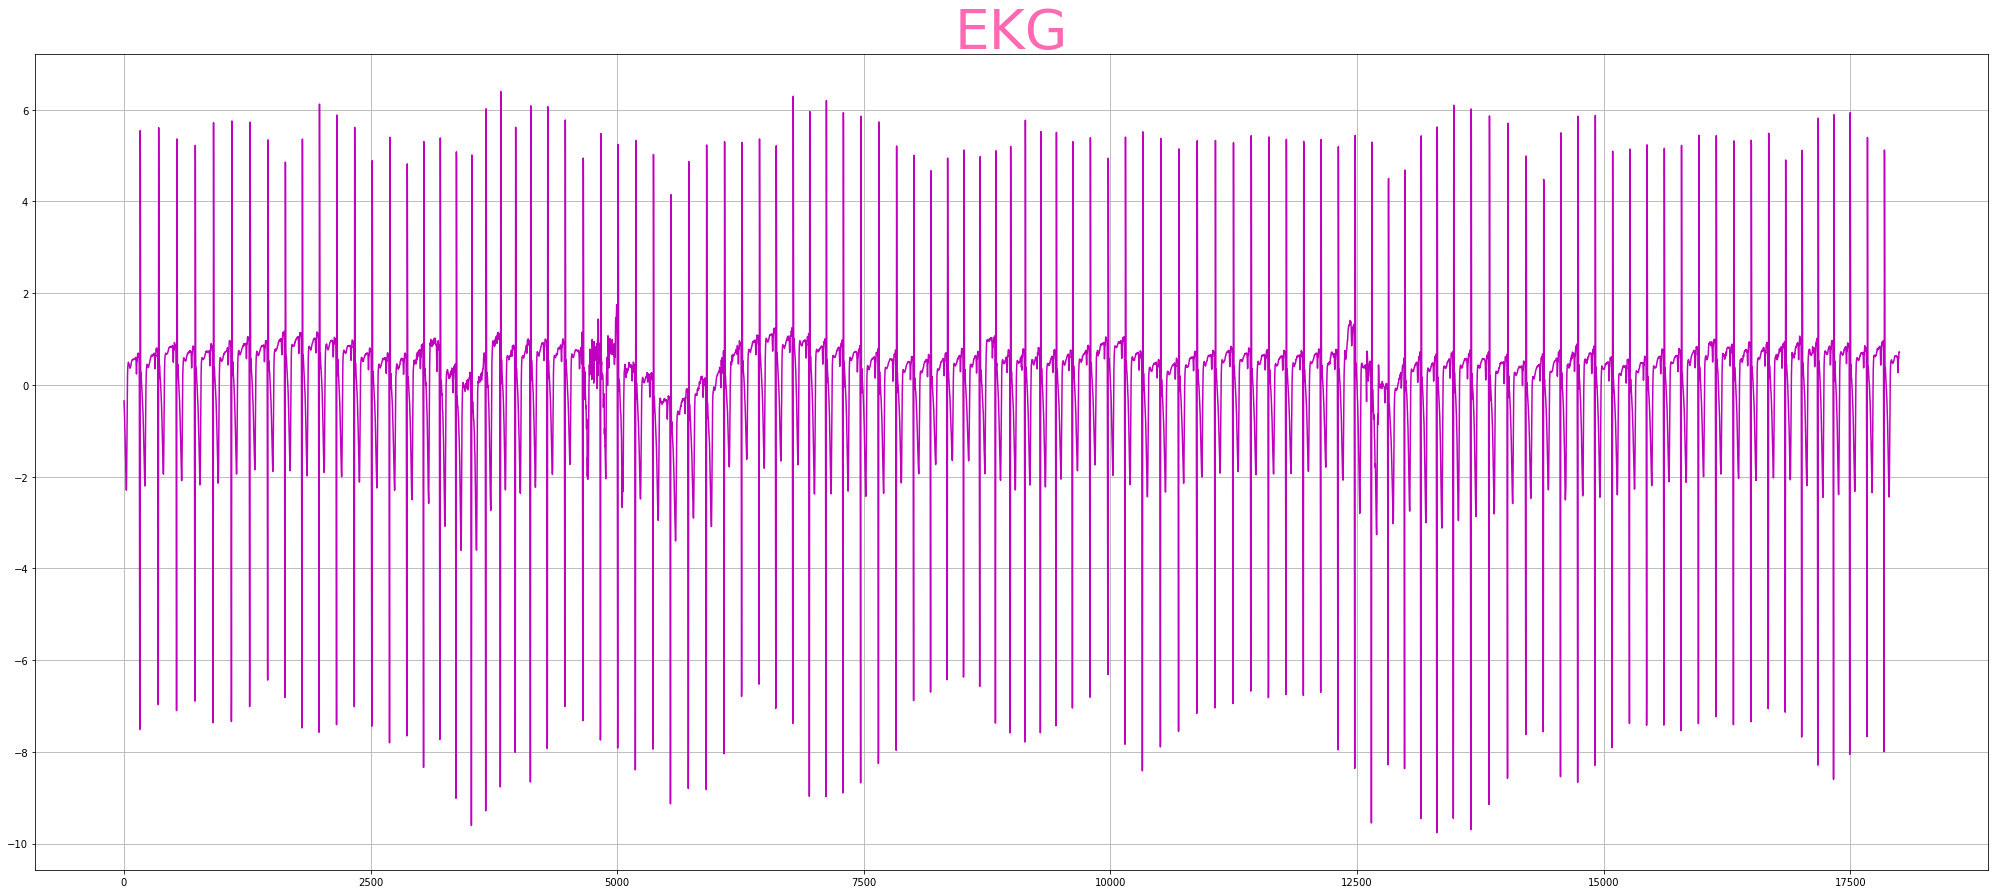

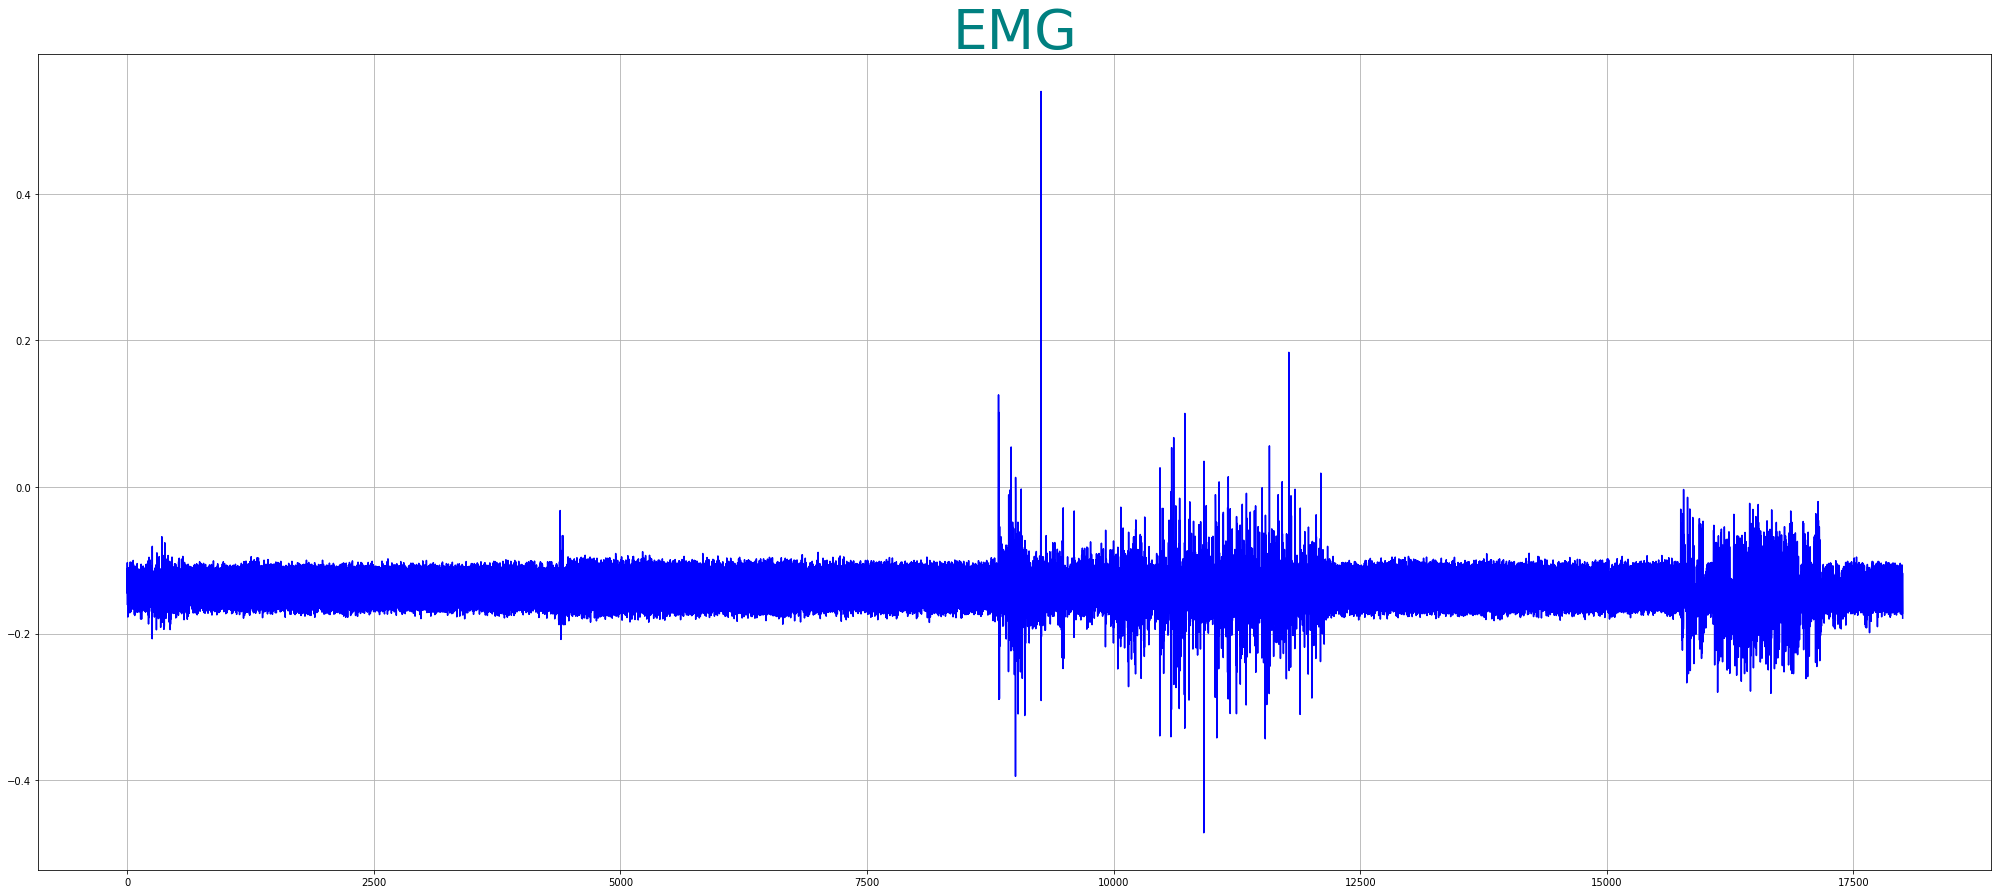

In [51]:
def abre(path, file_name):
    data = np.loadtxt(path+file_name, delimiter='\t', dtype='str')
    data = data[:-1,:-1].T.astype('float') #Elimina la última fila y columna que no contienen nada
    
    return data

path = '/home/moni/Descargas/MCIB-19-P-Edu/data/P1/' #Cambiar dependiendo de la compu
file = 'Apnea5.txt'


signals = abre(path,file)

PL = signals[0]
EKG = signals[1]
OX = signals[2]
EMG = signals[3]


plt.figure('EKG',figsize=(35,15))
plt.plot(EKG, 'm')
plt.grid()
plt.title('EKG', size=(55)).set_color(color='hotpink')
plt.figure('EMG', figsize=(35,15))
plt.title('EMG', size=(55)).set_color(color='teal')
plt.plot(EMG, 'b')
plt.grid()
plt.show()


In [32]:
# Primer punto de primer Actividad 
def compfft(signal):
    s_f = fft(signal) # fft de la señal original
    #Obtenemos las ventanas hanning, gaussiana, exponencial y chevy
    wh = hann(signal.shape[0])
    wg = gaussian(signal.shape[0],0.5)
    we = exponential(signal.shape[0])
    wb = chebwin(signal.shape[0],100)
    #multiplicacion de ventana por la señal
    Eh = wh*signal 
    Eg = wg*signal
    Ee = we*signal
    Eb = wb*signal
    
    Fh = 20*np.log10(np.abs(fft(Eh)))
    Fg = 20*np.log10(np.abs(fft(Eg)))
    Fe = 20*np.log10(np.abs(fft(Ee)))
    Fb = 20*np.log10(np.abs(fft(Eb)))    
    #Graficas fft's
    plt.figure('FFT',figsize=(10,5))
    plt.title('FFT', fontsize=55).set_color(color='red')
    plt.grid()
   # plt.plot(s_f[2:len(s_f)//2], 'k')
    plt.plot(Fh[2:len(Fh)//2], 'm')
    plt.plot(Fg[2:len(Fg)//2], color='blue')
    plt.plot(Fe[2:len(Fe)//2], color='red')
    plt.plot(Fb[2:len(Fb)//2], color='green')
    plt.xlabel('Frecuencia en muestras', fontsize=50).set_color(color='white')


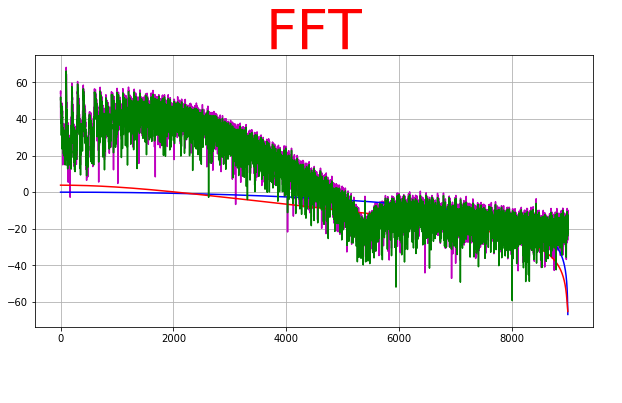

In [8]:
compfft(EKG)



In [60]:
# Tercer punto de pimer actividad Funcion para evaluar la respuesta en frecuencia de cualquier filtro
# diseñamos un filtro pasa banda butterworth de N orden
def butterbp(cutoff, cutoff2, fs, order):
    Fc1 = np.array([cutoff, cutoff2])*2/fs
    b, a = signal.butter(order, Fc1 , btype='bandpass')

    w, h = signal.freqz(b, a)
    fig = plt.figure()
    plt.title('Digital filter frequency response')
    ax1 = fig.add_subplot(111)

    plt.plot( 20 * np.log10(np.abs(h)), 'b')
    plt.ylabel('Amplitude [dB]', color='b')
    plt.xlabel('Frequency [rad/sample]')

    ax2 = ax1.twinx()
    angles = np.unwrap(np.angle(h))
    plt.plot( angles, 'g')
    plt.ylabel('Angle (radians)', color='g')
    plt.grid()
    plt.axis('tight')
    plt.show()
    
    return b, a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


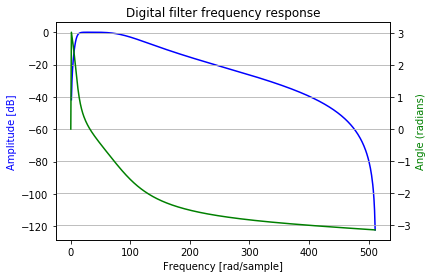

(array([ 0.0542127 ,  0.        , -0.10842539,  0.        ,  0.0542127 ]),
 array([ 1.        , -3.1795688 ,  3.83983347, -2.11811513,  0.45885207]))

In [62]:
butterbp(5, 50, 512, 2)

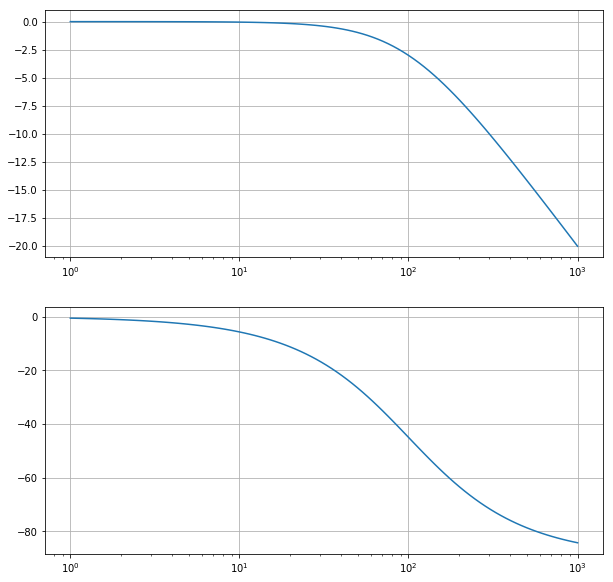

In [55]:
# creando el filtro desde cero dando valores a: a y b
sys1 = signal.lti(1, [1 / 100, 1]) # Creamos el sistema pasabajas primer orden
w, mag, phase = signal.bode(sys1) # Diagrama de bode: frecuencias, magnitud y fase
fig, axs= plt.subplots(2, 1, figsize=(10, 10))
axs[0].semilogx(w, mag) # Ejes logaritmicos
axs[1].semilogx(w, phase) 
axs[0].grid()
axs[1].grid()

In [ ]:
# Cuarto punto 

In [ ]:
# Quinto punto de la primer actividad
# quitaremos tendencia de EKG



Text(0.5, 1.0, 'Espectro de EMG')

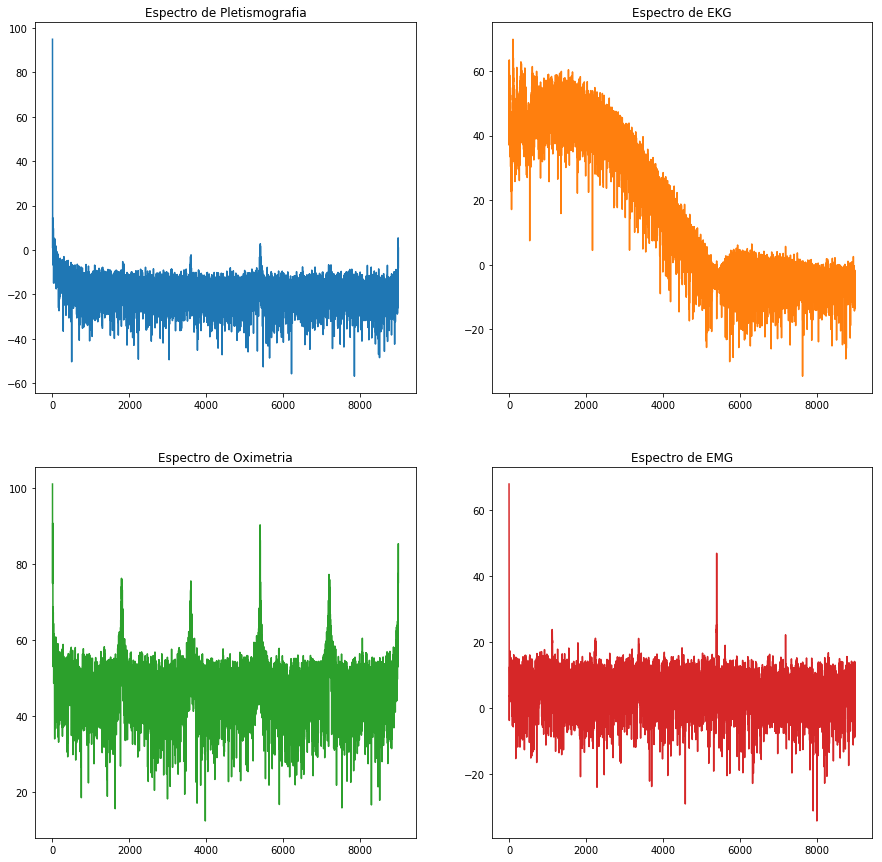

In [54]:
# Primer punto de segunda actividad 
# Estimar el espectro con FFT

fig, axs = plt.subplots (2, 2, figsize = (15,15))
axs[0, 0].plot(20*np.log10(np.abs(fft(PL)[:len(PL)//2])))
axs[0, 0].set_title('Espectro de Pletismografia')
axs[0, 1].plot(20*np.log10(np.abs(fft(EKG)[:len(EKG)//2])), 'tab:orange')
axs[0, 1].set_title('Espectro de EKG')
axs[1, 0].plot(20*np.log10(np.abs(fft(OX)[:len(OX)//2])), 'tab:green')
axs[1, 0].set_title('Espectro de Oximetria')
axs[1, 1].plot(20*np.log10(np.abs(fft(EMG)[:len(EMG)//2])), 'tab:red')
axs[1, 1].set_title('Espectro de EMG')

# Estimacion con PSD

